<a href="https://colab.research.google.com/github/DillFennel/Hotels_decisionTree/blob/main/%D0%9E%D1%82%D0%B5%D0%BB%D0%B8_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

Загрузим данные

In [ ]:
from google.colab import drive
drive.mount("/content/drive") # Подключаем импорт из гугл диска
# Считаем данные об обучающей выборке
df = pd.read_csv("/content/drive/My Drive/hotels/train_final.csv")
print(f"Размер датафрейма (строки и колонки): ", df.shape)
# Посмотрим данные из обучающей выборки
print("\nПредставление данных в датафрейме")
df.head()

Mounted at /content/drive
Размер датафрейма (строки и колонки):  (44638, 29)

Представление данных в датафрейме


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


Посмотрим на то, какие данные в датафрейме

In [ ]:
print("Посмотрим информацию о датафрейме")
print(df.info())

Посмотрим информацию о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12

In [ ]:
print("Проверим, есть ли пустые данные в датафрейме train")
print(df.isna().sum())

Проверим, есть ли пустые данные в датафрейме train
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_

In [ ]:
# Посмотрим на статистику характеристик
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,44638.000000,44638.000000,44638.00000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000
mean,0.297594,99.395291,2016.15675,27.095166,15.778328,0.931516,2.507303,1.852883,0.102424,0.008289,0.034052,0.069672,0.140799,0.238026,2.149133,101.624687,0.067723,0.603253
std,0.457205,104.485734,0.70504,13.654692,8.807604,1.002021,1.928111,0.578898,0.393273,0.091649,0.181364,0.726281,1.540109,0.682989,17.134385,48.429930,0.255077,0.803659
min,0.000000,0.000000,2015.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,2016.00000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.380000,0.000000,0.000000
50%,0.000000,65.000000,2016.00000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,154.000000,2017.00000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.00000,53.000000,31.000000,16.000000,40.000000,55.000000,3.000000,2.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


In [ ]:
# Получаем данные об ункальных значениях всех переменных
for col_name in list(df.columns):
  print("Уникальные значения переменной", col_name, ":", df[col_name].unique())
  print("Минимальное значение: ", min(df[col_name].unique()))
  print("Максимальное значение: ", max(df[col_name].unique()))

Уникальные значения переменной hotel : ['Resort Hotel' 'City Hotel']
Минимальное значение:  City Hotel
Максимальное значение:  Resort Hotel
Уникальные значения переменной is_canceled : [0 1]
Минимальное значение:  0
Максимальное значение:  1
Уникальные значения переменной lead_time : [  3  50  14  18 263  45 131 152 102   4 160 344  30  58  10 252  22  80
  48 141 104  25  28 193  51  19  73 132 164   6 112 277   2  12   7 288
  91 147  52 228 256  20 178 346  84 139 168  74 128 243   1 110  13  62
  65  15  33 372   0  49 211  27   5  61 100  34  16 316 208 214 167  44
  79  56 231  67 107  63  32 120 327  81 217 542 163  24 454 300 105 137
 313  96  31  88 121 115  39 268  35  98  97 324 157 356  86 133 220  23
  47  40 245 183 443 223 130 287 209 154 155  64  68 405 188 232 206   8
 255 181  55 108  57 161  29 146  26 159 149 109 207  82 127 386  95 298
 124 153  93 507  21 116  72 134 254 237 305 226  17 213   9  41 177  46
  38 332 304 191 156 175 158  53  54 114  42 322 180 129  

In [ ]:
# Мы решаем задачу классификации. По данным об брони, нам нужно понять, будет ли отмена брони
# Целевой переменной является Sпеременная is_canceled

Проверка сбалансированности is_canceled

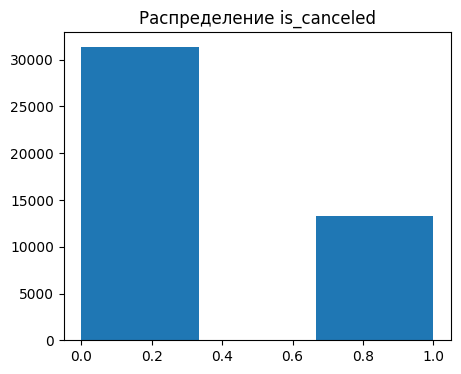

In [ ]:
plt.figure(figsize=(5, 4))
plt.title('Распределение is_canceled')
plt.hist(df['is_canceled'], bins=3)
plt.show()

Как видим, классы сбалансированны плохо. Поэтому пересбалансируем их

Трансформация переменной children

In [ ]:
# Трансформация children
df = df.astype({'children': 'int64'})

In [ ]:
print("Тип  переменной children:", df['children'].dtype)
print("Уникальные значения переменной children:", df['children'].unique())

Тип  переменной children: int64
Уникальные значения переменной children: [0 2 1 3]


Трансформация переменной meal

In [ ]:
# Трансформация meal
df['meal'] = df['meal'].replace('Undefined', 'SC')

In [ ]:
print("Уникальные значения переменной meal:", df['meal'].unique())

Уникальные значения переменной meal: ['BB' 'HB' 'SC' 'FB']


Удаление излишнего столбца reservation_status_date

In [ ]:
# Удаляем столбец reservation_status_date
df = df.drop('reservation_status_date', axis=1)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

Кодирование категориальных переменных

In [ ]:
# Посмотрим, где есть пробелы
for col_name in df.select_dtypes('object').columns:
  print(col_name, df[col_name].unique())

hotel ['Resort Hotel' 'City Hotel']
arrival_date_month ['February' 'November' 'September' 'December' 'March' 'July' 'October'
 'April' 'June' 'May' 'January' 'August']
meal ['BB' 'HB' 'SC' 'FB']
country ['PRT' 'BEL' 'ITA' 'ESP' 'DEU' 'AUS' 'CHE' 'GBR' 'FRA' 'USA' 'URY' 'CN'
 'CHN' 'ROU' 'DNK' 'BRA' 'FIN' 'IRL' 'NLD' 'AUT' 'AGO' 'BGR' 'IRQ' 'OMN'
 'RUS' 'NOR' 'PER' 'NZL' 'TUN' 'ISR' 'KOR' 'POL' 'EST' 'TUR' 'IND' 'LVA'
 'PHL' 'CZE' 'ARG' 'MAC' 'GRC' 'HUN' 'SWE' 'NGA' 'MAR' 'SVN' 'MOZ' 'CHL'
 'PAN' 'UGA' 'MEX' 'ARE' 'EGY' 'HRV' 'ATF' 'SRB' 'SVK' 'LUX' 'COL' 'JPN'
 'LBN' 'ECU' 'TZA' 'THA' 'CYP' 'TWN' 'ZAF' 'UKR' 'BOL' 'LTU' 'DZA' 'SGP'
 'PAK' 'CIV' 'QAT' 'LKA' 'TJK' 'VEN' 'BLR' 'IRN' 'ATA' 'MYS' 'IDN' 'ISL'
 'CRI' 'UZB' 'JOR' 'KWT' 'SAU' 'HKG' 'MLT' 'ALB' 'GEO' 'KNA' 'MDV' 'BFA'
 'RWA' 'LBY' 'TMP' 'GIB' 'NAM' 'BIH' 'BHS' 'FRO' 'LCA' 'KAZ' 'SEN' 'JEY'
 'LAO' 'ARM' 'BGD' 'NIC' 'GGY' 'AZE' 'VNM' 'SUR' 'NPL' 'MCO' 'SLV' 'PRI'
 'GNB' 'MUS' 'DOM' 'GUY' 'MRT' 'CPV' 'CMR' 'DMA' 'GHA' 'MKD' 'ZWE' '

In [ ]:
# Удаляем пробелы в hotel, market_segment и deposit_type
df['hotel'] = df['hotel'].str.replace(' ', '')
df['market_segment'] = df['market_segment'].str.replace(' ', '')
df['deposit_type'] = df['deposit_type'].str.replace(' ', '')
print("Полученые данные")
print(df['hotel'].unique())
print(df['market_segment'].unique())
print(df['deposit_type'].unique())

Полученые данные
['ResortHotel' 'CityHotel']
['Direct' 'OnlineTA' 'Groups' 'OfflineTA/TO' 'Corporate' 'Complementary'
 'Aviation']
['NoDeposit' 'NonRefund' 'Refundable']


In [ ]:
# Кодирование категориальных переменных при помощи OneHotEncoder
onehotencoder = OneHotEncoder(sparse_output=False)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
one_hot_encoded = onehotencoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehotencoder.get_feature_names_out(categorical_columns))
df = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

In [ ]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_NoDeposit,deposit_type_NonRefund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,3,2016,7,12,0,2,2,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,50,2016,47,18,1,2,2,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,14,2015,37,7,1,5,2,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,18,2015,50,6,2,0,2,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,263,2016,40,29,2,4,2,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Удаление выбросов

Распределения переменных


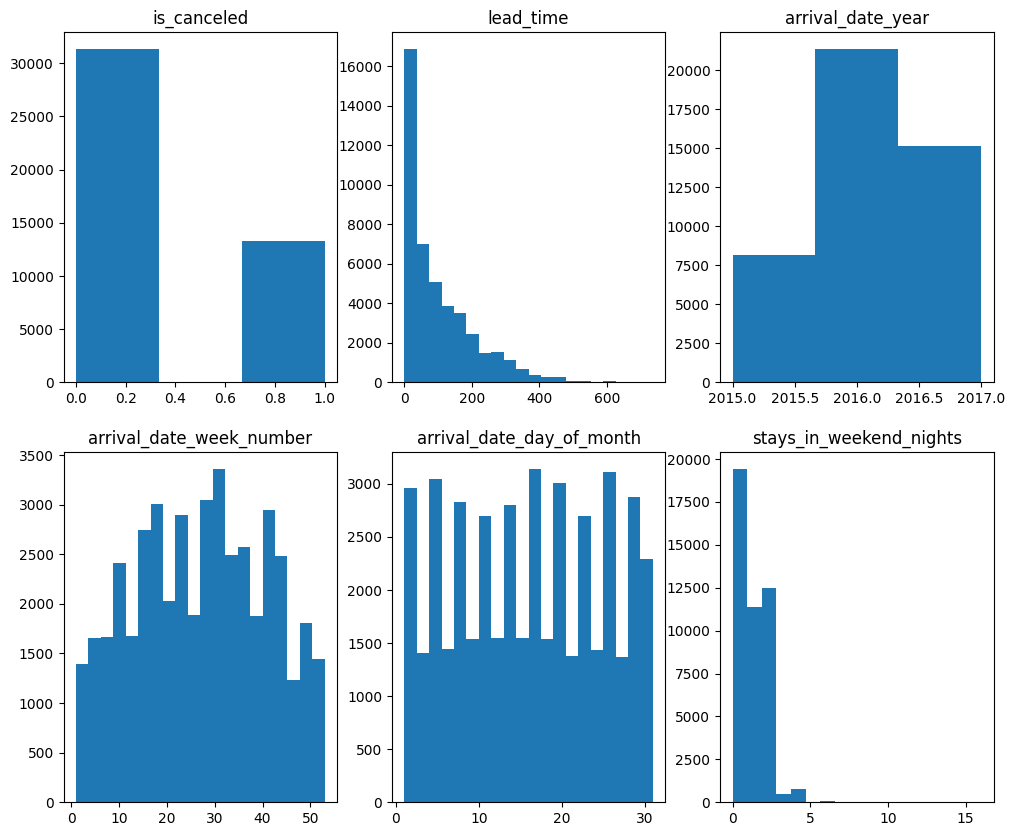

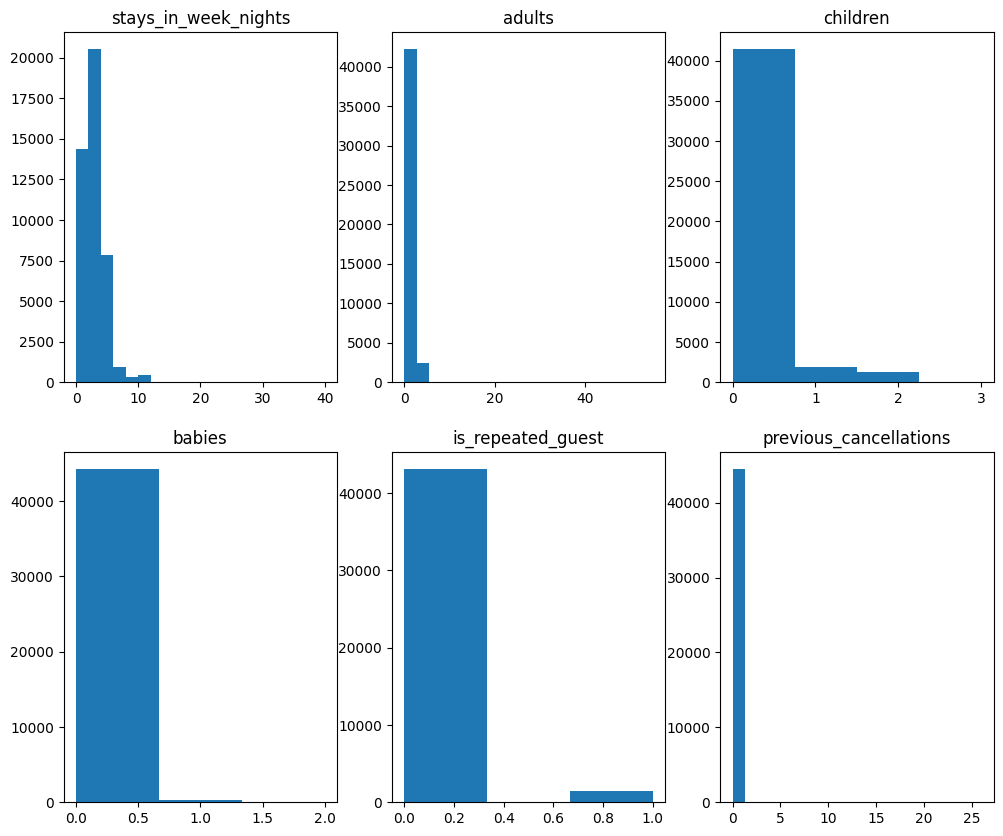

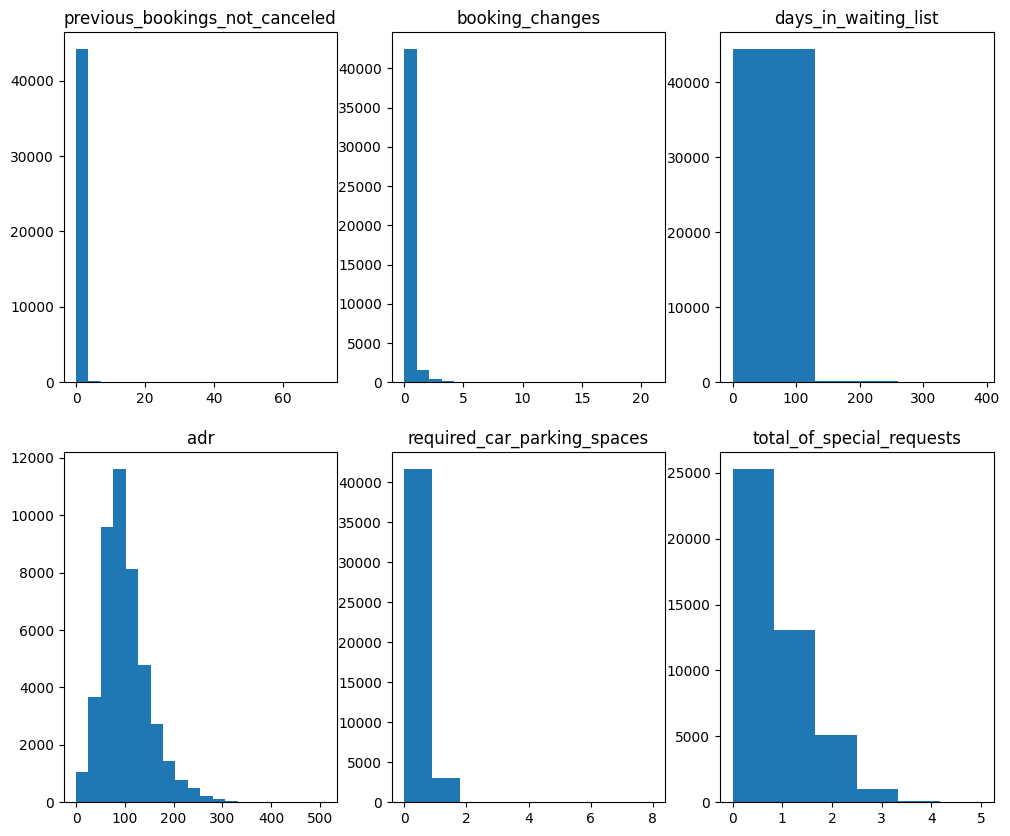

In [ ]:
# Посмотрим на распределение переменных
print('Распределения переменных')
plt.figure(figsize=(12, 10))
plt.subplot(2,3,1)
plt.title('is_canceled')
plt.hist(df['is_canceled'], bins=3)
plt.subplot(2,3,2)
plt.title('lead_time')
plt.hist(df['lead_time'], bins=20)
plt.subplot(2,3,3)
plt.title('arrival_date_year')
plt.hist(df['arrival_date_year'], bins=3)
plt.subplot(2,3,4)
plt.title('arrival_date_week_number')
plt.hist(df['arrival_date_week_number'], bins=20)
plt.subplot(2,3,5)
plt.title('arrival_date_day_of_month')
plt.hist(df['arrival_date_day_of_month'], bins=20)
plt.subplot(2,3,6)
plt.title('stays_in_weekend_nights')
plt.hist(df['stays_in_weekend_nights'], bins=17)
plt.figure(figsize=(12, 10))
plt.subplot(2,3,1)
plt.title('stays_in_week_nights')
plt.hist(df['stays_in_week_nights'], bins=20)
plt.subplot(2,3,2)
plt.title('adults')
plt.hist(df['adults'], bins=20)
plt.subplot(2,3,3)
plt.title('children')
plt.hist(df['children'], bins=4)
plt.subplot(2,3,4)
plt.title('babies')
plt.hist(df['babies'], bins=3)
plt.subplot(2,3,5)
plt.title('is_repeated_guest')
plt.hist(df['is_repeated_guest'], bins=3)
plt.subplot(2,3,6)
plt.title('previous_cancellations')
plt.hist(df['previous_cancellations'], bins=20)
plt.figure(figsize=(12, 10))
plt.subplot(2,3,1)
plt.title('previous_bookings_not_canceled')
plt.hist(df['previous_bookings_not_canceled'], bins=20)
plt.subplot(2,3,2)
plt.title('booking_changes')
plt.hist(df['booking_changes'], bins=20)
plt.subplot(2,3,3)
plt.title('days_in_waiting_list')
plt.hist(df['days_in_waiting_list'], bins=3)
plt.subplot(2,3,4)
plt.title('adr')
plt.hist(df['adr'], bins=20)
plt.subplot(2,3,5)
plt.title('required_car_parking_spaces')
plt.hist(df['required_car_parking_spaces'], bins=9)
plt.subplot(2,3,6)
plt.title('total_of_special_requests')
plt.hist(df['total_of_special_requests'], bins=6)
plt.show()

Выбросы скорее всего есть в: stays_in_weekend_nights, stays_in_week_nights, adults, previous_cancellations, previous_bookings_not_canceled, booking_changes, days_in_waiting_list

In [ ]:
df.shape

(44638, 230)

In [ ]:
for col_name in ['stays_in_weekend_nights', 'stays_in_week_nights', \
                 'previous_cancellations', 'previous_bookings_not_canceled', \
                 'booking_changes', 'days_in_waiting_list']:
  df = df[df[col_name]<=df[col_name].quantile(q=0.75)+1.5*(df[col_name].quantile(q=0.75)-df[col_name].quantile(q=0.25))]


In [ ]:
df.shape

(32837, 230)

Создание тренировочной и тестовой выборок

In [ ]:
# Вектор признаков
x = df.drop(columns=['is_canceled'])
# Вектор ответов
y = df['is_canceled']
# Создаем тренировочные и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.7)

In [ ]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (22985, 229)
y_train: (22985,)
x_test: (9852, 229)
y_test: (9852,)


Создадим модель случайного леса

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

Расчитаем матрицу ошибок

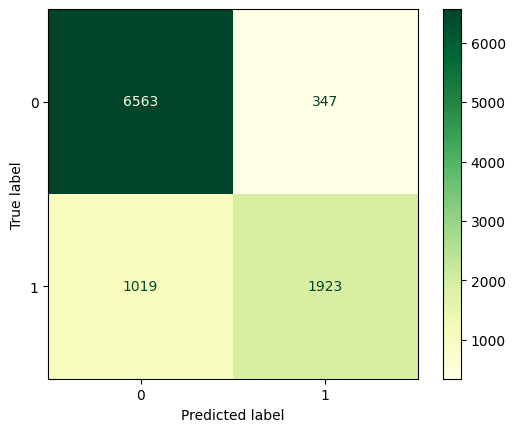

In [ ]:
# Расчитаем матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.YlGn)
plt.show()

Расчитаем метрики качества модели

In [ ]:
# Посчитаем метрики
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('FPR:', fp / (fp + tn))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred))

Accuracy: 0.8613479496548924
Precision: 0.847136563876652
Recall: 0.6536369816451394
FPR: 0.050217076700434155
ROC-AUC  : 0.8017099524723527


Для сравнения, попробуем сделать модель дерева решений

In [ ]:
# Создадим можель дерева решений
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

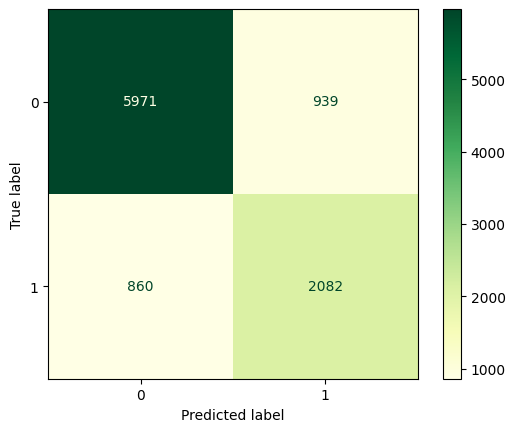

In [ ]:
# Расчитаем матрицу ошибок для дерева решений
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.YlGn)
plt.show()

In [ ]:
# Посчитаем метрики для дерева решений
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('FPR:', fp / (fp + tn))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred))

Accuracy: 0.8173974827446204
Precision: 0.689175769612711
Recall: 0.707681849082257
FPR: 0.13589001447178004
ROC-AUC  : 0.7858959173052384
